<a href="https://colab.research.google.com/github/financieras/big_data/blob/main/retos/reto_006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto 6. Dataset "Iris" desde Seaborn**
- Carga Iris desde Seaborn: `sns.load_dataset('iris')`
- Explora estructura con `.shape`, `.info()`, `.columns`
- Verifica valores nulos
- Calcula número de observaciones por especie con `.value_counts()`

# **Resolución del Reto 6**

## **Paso 1: Cargar dataset Iris desde Seaborn**
El dataset Iris contiene **150 muestras** de flores con **4 características numéricas** (medidas de sépalos y pétalos) clasificadas en **3 especies** igualmente distribuidas:
- **setosa**
- **versicolor** y
- **virginica** (50 muestras cada una)

Es el dataset clásico para problemas de clasificación en machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("🌸 Paso 1: Cargando dataset Iris desde Seaborn...")
df = sns.load_dataset('iris')
print("✅ Dataset Iris cargado correctamente desde Seaborn")

🌸 Paso 1: Cargando dataset Iris desde Seaborn...
✅ Dataset Iris cargado correctamente desde Seaborn


## **Paso 2: Explorar estructura del dataset**
Conocer la forma del dataset y sus columnas es esencial para entender qué tipo de información contiene.

In [13]:
print("📏 Paso 2: Explorando estructura del dataset...")
print(f"Dimensiones del dataset: {df.shape}")
print(f"- Filas (observaciones): {df.shape[0]}")
print(f"- Columnas (características): {df.shape[1]}")

print("\n🏷️ Columnas disponibles:")
for i, columna in enumerate(df.columns, 1):
    print(f"   {i}. {columna}")

print("\n👀 Primeras 5 filas del dataset:")
df.head()

📏 Paso 2: Explorando estructura del dataset...
Dimensiones del dataset: (150, 5)
- Filas (observaciones): 150
- Columnas (características): 5

🏷️ Columnas disponibles:
   1. sepal_length
   2. sepal_width
   3. petal_length
   4. petal_width
   5. species

👀 Primeras 5 filas del dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# mostrando directamente el contenido de 'df.columns'
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## **Paso 3: Información detallada del dataset**

In [ ]:
print("📋 Paso 3: Información detallada del dataset...")
print("\n🔍 Información general con .info():")
print(df.info())

print("\n📊 Resumen de tipos de datos:")
print(f"- Columnas numéricas: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"- Columnas categóricas: {len(df.select_dtypes(include=['object']).columns)}")

print("\n🏷️ Nombres de columnas con .columns:")
print(f"Columnas: {list(df.columns)}")

📋 Paso 3: Información detallada del dataset...

🔍 Información general con .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

📊 Resumen de tipos de datos:
- Columnas numéricas: 4
- Columnas categóricas: 1

🏷️ Nombres de columnas con .columns:
Columnas: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


## **Paso 4: Verificar valores nulos**
Aunque el dataset Iris es limpio por diseño, es buena práctica comprobar siempre la integridad de los datos.

In [19]:
print("❓ Paso 4: Verificando valores nulos...")
valores_nulos = df.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos)

total_nulos = valores_nulos.sum()
print(f"\n📈 Total de valores nulos en el dataset: {total_nulos}")
print(f"📊 Porcentaje de valores nulos: {(total_nulos / (df.shape[0] * df.shape[1]) * 100):.2f}%")

# Verificar si hay columnas con valores nulos
columnas_con_nulos = valores_nulos[valores_nulos > 0]
if total_nulos == 0:
    print("\n✅ Excelente! No hay valores nulos.")
else:
    print(f"\n🚨 Columnas con valores nulos: {len(columnas_con_nulos)}")
    for columna, nulos in columnas_con_nulos.items():
        print(f"   - {columna}: {nulos} nulos ({nulos/df.shape[0]*100:.1f}%)")

❓ Paso 4: Verificando valores nulos...
Valores nulos por columna:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

📈 Total de valores nulos en el dataset: 0
📊 Porcentaje de valores nulos: 0.00%

✅ Excelente! No hay valores nulos.


## **Paso 5: Número de observaciones por especie**
Una de las variables clave en este dataset es `species`.  
Saber cuántas flores hay de cada tipo nos da una idea de balance en los datos.

In [ ]:
print("🌺 Paso 5: Calculando número de observaciones por especie...")

conteo_especies = df['species'].value_counts()
print("\n📊 Número de observaciones por especie:")
print(conteo_especies)

print("\n📈 Distribución porcentual:")
porcentaje_especies = df['species'].value_counts(normalize=True) * 100
for especie, count in conteo_especies.items():
    porcentaje = porcentaje_especies[especie]
    print(f"   - {especie}: {count} observaciones ({porcentaje:.1f}%)")

print(f"\n🎯 Total de observaciones: {conteo_especies.sum()}")
print(f"🔢 Número de especies diferentes: {len(conteo_especies)}")

🌺 Paso 5: Calculando número de observaciones por especie...

📊 Número de observaciones por especie:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

📈 Distribución porcentual:
   - setosa: 50 observaciones (33.3%)
   - versicolor: 50 observaciones (33.3%)
   - virginica: 50 observaciones (33.3%)

🎯 Total de observaciones: 150
🔢 Número de especies diferentes: 3


## **Paso 6: Visualización de la distribución por especie**

📊 Paso 6: Visualizando distribución por especie...


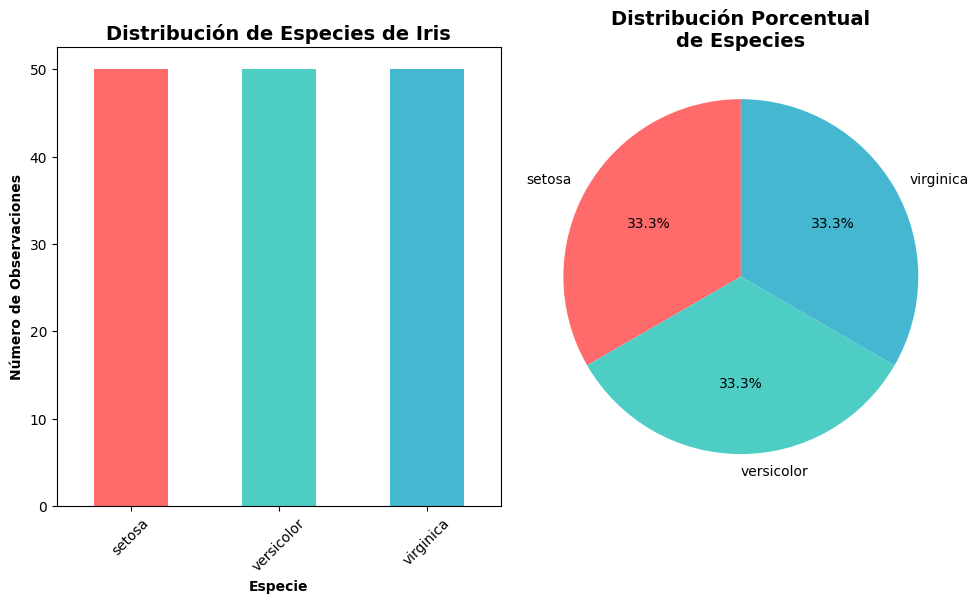

In [ ]:
print("📊 Paso 6: Visualizando distribución por especie...")

plt.figure(figsize=(10, 6))

# Gráfico de barras para la distribución de especies
plt.subplot(1, 2, 1)
conteo_especies.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Distribución de Especies de Iris', fontsize=14, fontweight='bold')
plt.xlabel('Especie', fontweight='bold')
plt.ylabel('Número de Observaciones', fontweight='bold')
plt.xticks(rotation=45)

# Gráfico de pie para la distribución porcentual
plt.subplot(1, 2, 2)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
plt.pie(conteo_especies, labels=conteo_especies.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Distribución Porcentual\nde Especies', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## **Paso 7: Resumen ejecutivo del análisis**

In [ ]:
print("📈 Paso 7: Resumen ejecutivo del análisis exploratorio")

print("\n" + "="*50)
print("         RESUMEN EJECUTIVO - DATASET IRIS")
print("="*50)

print(f"📊 DIMENSIONES: {df.shape[0]} observaciones × {df.shape[1]} características")

print(f"🔍 TIPOS DE DATOS:")
print(f"   - Numéricas: {len(df.select_dtypes(include=[np.number]).columns)} columnas")
print(f"   - Categóricas: {len(df.select_dtypes(include=['object']).columns)} columna")

nulos_totales = df.isnull().sum().sum()
print(f"❓ VALORES NULOS: {nulos_totales} ({nulos_totales/(df.shape[0]*df.shape[1])*100:.1f}% del dataset)")

# Principales hallazgos
print(f"🎯 PRINCIPALES HALLAZGOS:")
conteo_especies = df['species'].value_counts()
for especie, count in conteo_especies.items():
    porcentaje = (count / df.shape[0]) * 100
    print(f"   - {especie}: {count} observaciones ({porcentaje:.1f}%)")

print(f"\n✅ Columnas disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

print("\n🎉 ¡Reto 6 completado! Análisis exploratorio del dataset Iris finalizado")
print("="*50)

📈 Paso 7: Resumen ejecutivo del análisis exploratorio

         RESUMEN EJECUTIVO - DATASET IRIS
📊 DIMENSIONES: 150 observaciones × 5 características
🔍 TIPOS DE DATOS:
   - Numéricas: 4 columnas
   - Categóricas: 1 columna
❓ VALORES NULOS: 0 (0.0% del dataset)
🎯 PRINCIPALES HALLAZGOS:
   - setosa: 50 observaciones (33.3%)
   - versicolor: 50 observaciones (33.3%)
   - virginica: 50 observaciones (33.3%)

✅ Columnas disponibles:
    1. sepal_length
    2. sepal_width
    3. petal_length
    4. petal_width
    5. species

🎉 ¡Reto 6 completado! Análisis exploratorio del dataset Iris finalizado


## **🎯 Puntos clave del Reto 6**

1. **Carga desde Seaborn**: Uso de datasets embebidos en librerías. Usar `sns.load_dataset()` es rápido y confiable para datasets clásicos.
2. **Estructura del dataset**: Entender dimensiones y tipos de datos. `.shape`, `.columns` e `.info()` son herramientas esenciales del EDA.

3. **Calidad de datos**: Verificación de valores nulos. Aunque el dataset sea pequeño y limpio, siempre se debe verificar la ausencia de nulos.
4. **Distribución por categoría**: Análisis de frecuencia por especie. `.value_counts()` permite entender la distribución de variables cualitativas como species.
5. **Visualización**: Gráficos para comprender la distribución
6. **Resumen ejecutivo**: Síntesis de hallazgos importantes

**📚 Valor educativo**: Este reto enseña el análisis exploratorio básico de datasets de clasificación, fundamentales en machine learning, mostrando cómo evaluar la distribución balanceada de clases y la calidad de los datos.